This homework instruction is based on the YOLOv5 github's train custom data tutorial. Please see more details at https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

# Clone YOLOv5 Github
Clone YOLOv5 github onto working directory and install any necessary Python packages.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%cd /content

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
/content


# Create Dataset

YOLOv5 models must be trained on labelled data in order to learn classes of objects in that data. The official tutorial gave two options for creating your dataset before you start training, but we will only use [Roboflow](https://roboflow.com/) for simplicity and skipping the potential messy installation.

Use Roboflow to label, prepare, and host your custom data automatically in YOLOv5 format

## 1.1 Collect Images

The training and validation images of the crescent metallic surface defect are given in the homework packages under the training folder.

## 1.2 Create Labels
You will need to annotate the objects of interest to create a ground truth for your model to learn from. The object of interest is the crescent shape defect. Roboflow Annotate is a simple web-based tool for managing and labeling your images exporting them in YOLOv5's annotation format.

## 1.3 Prepare Dataset for YOLOv5

Prepare, Export, and Host Your Dataset with Roboflow

Roboflow is a convienent tool which you can use it to convert your dataset into YOLO format and create a YOLOv5 YAML configuration file. (Note: the uploaded dataset will be public, unless you pay for subscription.)

Create a free Roboflow account and upload both training and testing dataset to a Public workspace. You only need to label the training images. Then generate and export a version of your dataset in YOLOv5 Pytorch format.
(We suggested starting by annotating 50 training images and 36 validation images, and then run a training to test the performance. If the performance is not good enough, then proceed to label more training images. )

NOTE: During the export step 3, select the preprocessings: Auto-Orient and Resize to "Fit within" 640x640. During the export step 4, do not select any augmentation.

Export the annotation in "YOLO v5 PyTorch" format and select "Show download code". This option allows us to download directly to Google Colab by copy and pasting the code:


In [ ]:
%cd yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WPBcnuuH7Ujj3zIwPnR8")
project = rf.workspace("157a").project("hw4157a")
dataset = project.version(1).download("yolov5")



%cd /content

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to HW4157A-1 in yolov5pytorch:: 100%|██████████| 381/381 [00:00<00:00, 4264.60it/s]

/content


# Select a Model

Select a pretrained model to start training from. Here we select YOLOv5s, the second-smallest and fastest model available. See the YOLOv5 README [table](https://github.com/ultralytics/yolov5#pretrained-checkpoints) for a full comparison of all models.

# Training

Train a YOLO model on our dataset by specifying dataset, batch-size, image size and on pretrained --weights yolov5s.pt. Pretrained weights are auto-downloaded from the latest YOLOv5 release.

Inspect the class and instance accuracy for performance indicator.

In [ ]:
# Train YOLOv5s on our dataset for at least 10 epochs (the default we provide is 50 epochs!)
# TODO: change the data.yaml path with your dataset name
!python yolov5/train.py --img 640 --batch 16 --epochs 50 --data yolov5/HW4157A-1/data.yaml --weights yolov5s.pt


2023-12-07 07:13:06.874924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 07:13:06.875016: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 07:13:06.875059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=yolov5/HW4157A-1/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=Fals

# Validation
Validate the performance of the trained model using the validation dataset. After running the code, go into the directory "yolov5/runs/val/exp#/" to take a look at the confusion matrix and the val_batch#_pred.jpg.

A good model should have a confusion matrix with high diagonal value and the pred image should only show boxes around all crescent defects.

If the model has a poor performance retrain it with more annotated samples, more epoches, or try another size of YOLOv5 models.

In [ ]:
# TODO: change the weight path to your experiment weight path
# (!BEWARE NEW TRAIN RUN EXP DIRECTORY IS GENERATED FOR EVERY TRAINING RUN!)
# TODO: change the data.yaml path with your dataset name
!python yolov5/val.py --weights yolov5/runs/train/exp/weights/best.pt --data yolov5/HW4157A-1/data.yaml --img 640

val: data=yolov5/HW4157A-1/data.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/HW4157A-1/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.01it/s]
                   all         36         36      0.995          1      0.995      0.739
Speed: 0.5ms pre-process, 13.5ms inference, 5.2ms NMS per image at shape (32, 3, 640, 640)
Results s

# Testing

After you train and validate a good model, use that model to detect and draw boxes around the test images. The code is given below. The results will be outputted to the directory "yolov5/runs/detect/exp#/" Your model should only draw boxes around the crescent defects and it should box all the crescent defects. If the requirements are not met, retrain another model.

In [ ]:
# Download test data
!wget https://ucsb.box.com/shared/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip
!unzip -o cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip

--2023-12-07 07:20:44--  https://ucsb.box.com/shared/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip
Resolving ucsb.box.com (ucsb.box.com)... 74.112.186.144
Connecting to ucsb.box.com (ucsb.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip [following]
--2023-12-07 07:20:44--  https://ucsb.box.com/public/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip
Reusing existing connection to ucsb.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ucsb.app.box.com/public/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip [following]
--2023-12-07 07:20:44--  https://ucsb.app.box.com/public/static/cb51ftt5lsx99jljgjo948w8ux1vc4ca.zip
Resolving ucsb.app.box.com (ucsb.app.box.com)... 74.112.186.144
Connecting to ucsb.app.box.com (ucsb.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcl

In [ ]:
# TODO: change the weight path to your experiment weight path
# (!BEWARE NEW TRAIN RUN EXP DIRECTORY IS GENERATED FOR EVERY TRAINING RUN!)
# NOTE: remove --device if you are not using gpu
!python yolov5/detect.py --source test_images --weights yolov5/runs/train/exp/weights/best.pt --device 0 --line-thickness 10

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=test_images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=10, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/45 /content/test_images/img_01_424799300_01133.jpg: 320x640 1 crescent-shape, 66.1ms
image 2/45 /content/test_images/img_01_424799600_00001.jpg: 320x640 1 crescent-shape, 12.1ms
image 3/45 /content/test_images/img_01_425007500_00001.jpg: 320x640 1 crescent-shape, 10.7ms
image 4/45 /content/test_images/img_

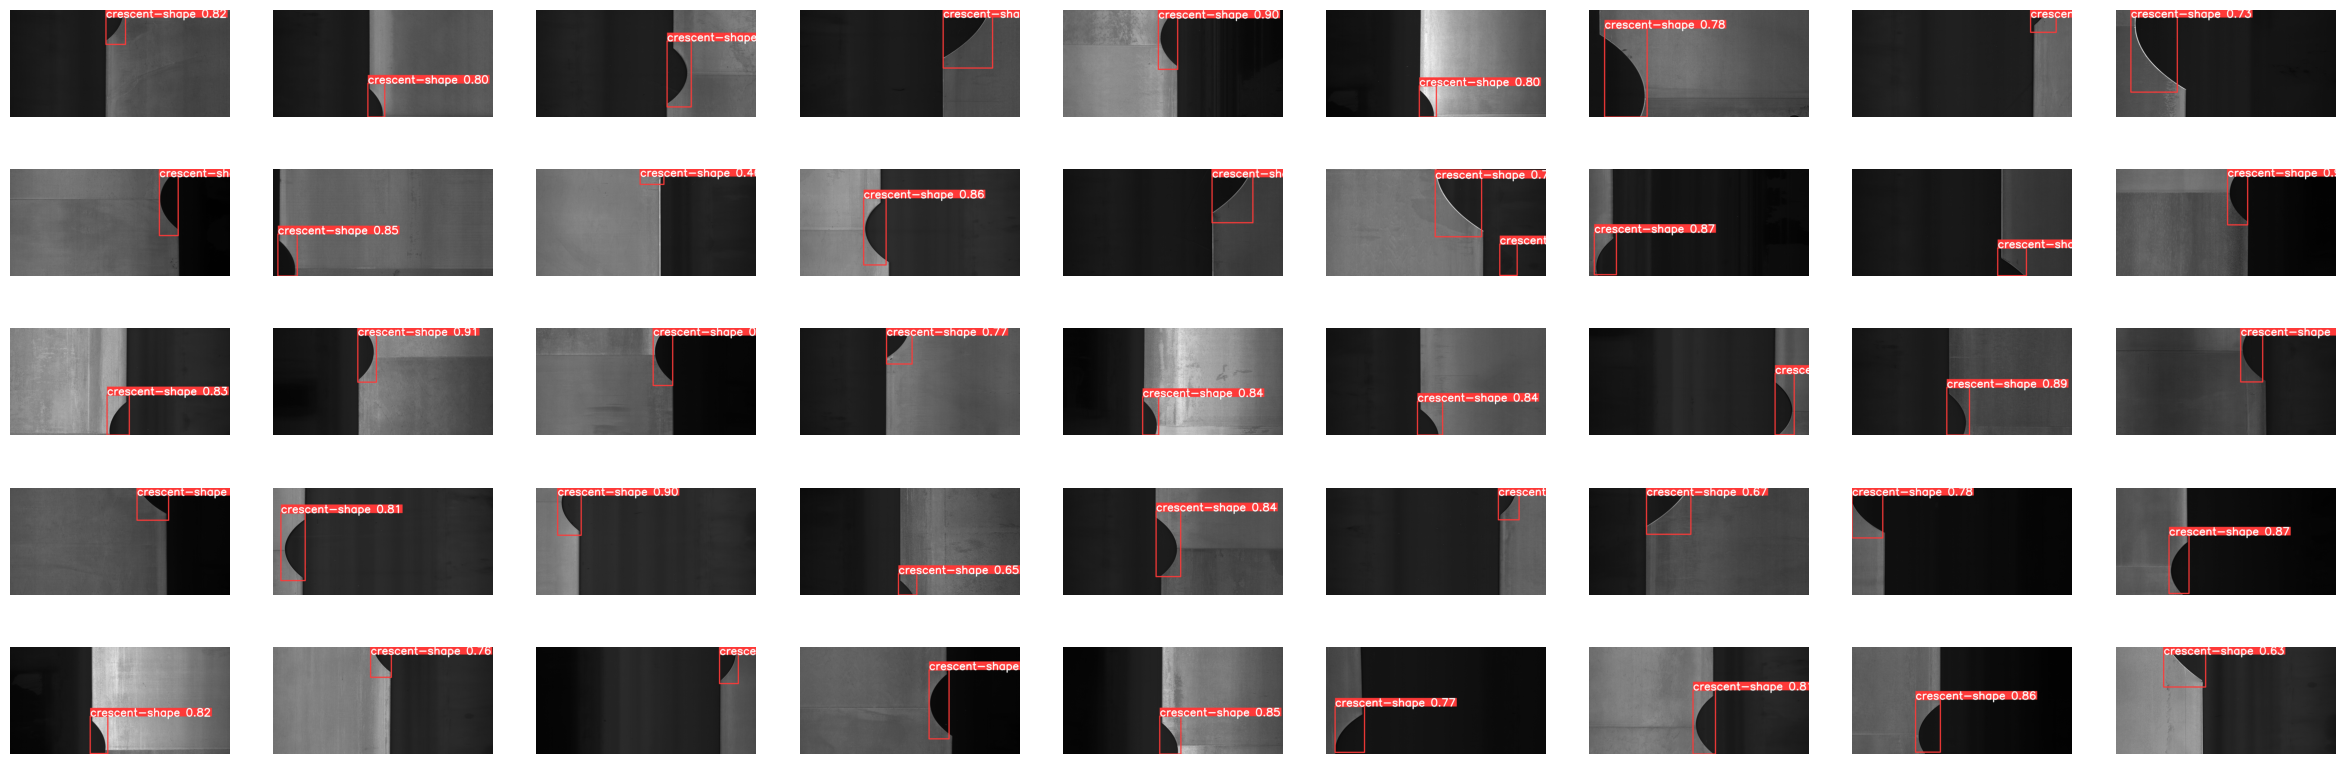

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

# show inference results
# TODO: your detect directory path, should look something like this "/content/yolov5/runs/detect/exp"
# (!BEWARE NEW TEST EXP DIRECTORY IS GENERATED FOR EVERY TEST RUN!)
detect_dir = "/content/yolov5/runs/detect/exp"
detect_dir = Path(detect_dir)

fig, axes = plt.subplots(5,9, figsize=(30, 10))
for ax, f in zip(axes.ravel(), detect_dir.iterdir()):
  image = Image.open(f)
  ax.imshow(image)
  ax.axis('off')
plt.show()